<a href="https://colab.research.google.com/github/yashaswi2311/IBM-Stock-Prediction/blob/master/LSTM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
#              to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

In [0]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [14]:
#Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2010-01-01', end='2020-03-20')
#Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.538483
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.584366
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.161509
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.113146
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.286753
...,...,...,...,...,...,...
2020-03-16,259.079987,240.000000,241.949997,242.210007,80605900.0,242.210007
2020-03-17,257.609985,238.399994,247.509995,252.860001,81014000.0,252.860001
2020-03-18,250.000000,237.119995,239.770004,246.669998,75058400.0,246.669998


In [15]:
#Get the number of rows and columns in the data set
df.shape

(2571, 6)

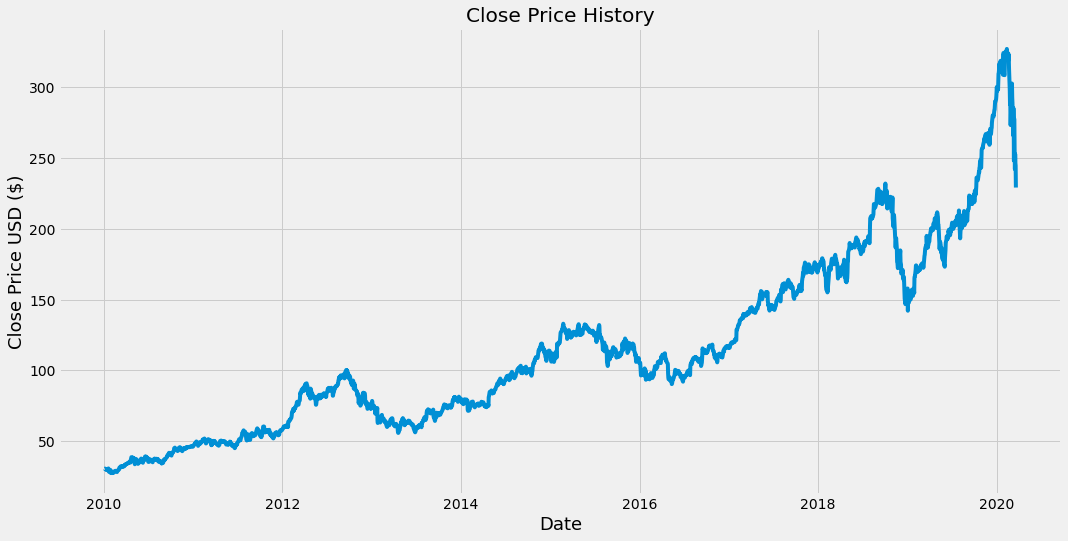

In [16]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [17]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

2057

In [18]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01046536],
       [0.01064169],
       [0.0090166 ],
       ...,
       [0.73135555],
       [0.7250506 ],
       [0.67320989]])

In [19]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([1.04653630e-02, 1.06416897e-02, 9.01660433e-03, 8.83074613e-03,
       9.49793954e-03, 8.60676186e-03, 7.46777113e-03, 8.86410644e-03,
       8.28269668e-03, 6.61471952e-03, 1.09562233e-02, 9.37879559e-03,
       7.63456630e-03, 2.71641848e-03, 5.25174452e-03, 6.61948528e-03,
       7.54402326e-03, 3.45032614e-03, 4.76575809e-06, 1.27719135e-03,
       1.81570929e-03, 3.42173159e-03, 0.00000000e+00, 1.62508533e-03,
       9.86486473e-04, 1.97297931e-03, 1.46305592e-03, 3.15485550e-03,
       3.96978105e-03, 5.40900818e-03, 5.00393146e-03, 5.18502391e-03,
       4.58455111e-03, 3.98884408e-03, 2.38758754e-03, 4.10322227e-03,
       4.74182113e-03, 5.99041794e-03, 8.07300968e-03, 8.00628907e-03,
       8.23503910e-03, 8.89270099e-03, 1.28195966e-02, 1.28815451e-02,
       1.47592156e-02, 1.56265581e-02, 1.59410981e-02, 1.64653188e-02,
       1.51499950e-02, 1.54406999e-02, 1.52834362e-02, 1.55360151e-02,
       1.43922586e-02, 1.55836726e-02, 1.73040668e-02, 1.77854020e-02,
     

In [0]:
#Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [21]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1997, 60, 1)

In [22]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [23]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [0]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1





 973/1997 [=============>................] - ETA: 1:11 - loss: 6.7279e-04

In [0]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  

In [0]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [0]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [0]:
#Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [0]:
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

In [0]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [0]:
#Show the valid and predicted prices
valid

In [0]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

In [0]:
#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(apple_quote2['Close'])